# Convert shapefile ofshafts to vtk
O. Kaufmann, 2021.

In [4]:
import pyvista as pv
import numpy as np
import geopandas as gpd
from geometron.geometries import gdf_to_points_gdf

<AxesSubplot:>

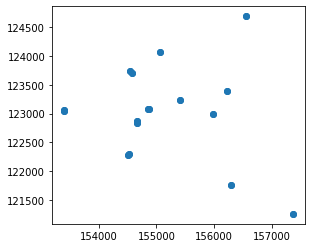

In [5]:
g = gpd.read_file('./tmp_files/Shaft.shp')
g.plot()

In [31]:
g['radius'] = 5

In [32]:
names = g['Nom'].unique()

In [33]:
shafts = []
for i in names:
    radius = g.query(f'Nom=="{i}"').radius.mean()
    vertices = np.array([(i.x, i.y, i.z) for i in g.query(f'Nom=="{i}"').geometry.values])
    line = pv.Spline(vertices)
    shafts.append(line.tube(radius=radius))
shafts = pv.MultiBlock(shafts)

In [34]:
shafts

MultiBlock (0x7f1f2f42e3a0)
  N Blocks:	17
  X Bounds:	153386.938, 157371.953
  Y Bounds:	121256.484, 124690.812
  Z Bounds:	-1063.400, 155.390

In [35]:
shafts.plot(jupyter_backend='panel')